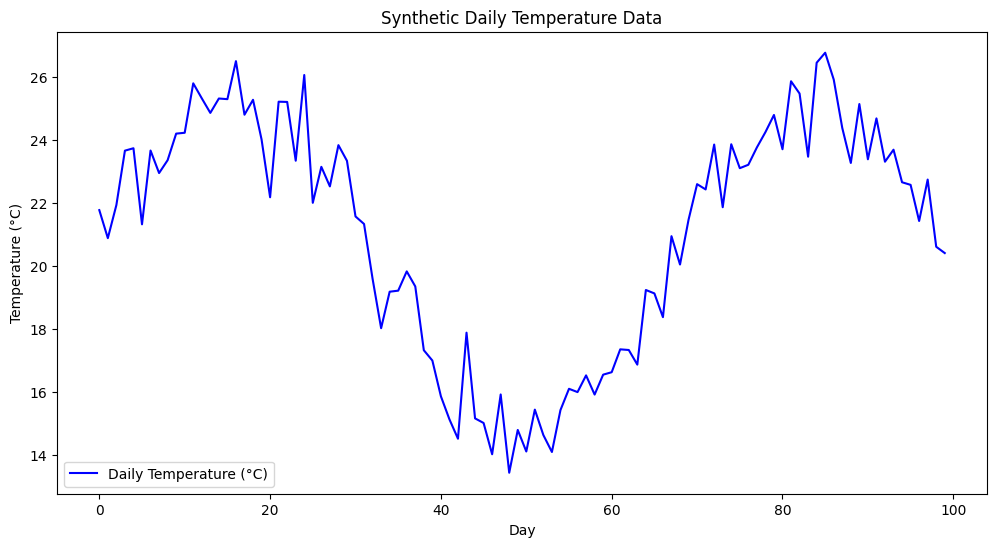

Epoch 0/1000, Loss: 376.91420673105563
Epoch 0/1000, Loss: 376.91420673105563


Epoch 100/1000, Loss: 14.23837780376522
Epoch 100/1000, Loss: 14.23837780376522


Epoch 200/1000, Loss: 14.238377793088677
Epoch 200/1000, Loss: 14.238377793088677


Epoch 300/1000, Loss: 14.238377782287339
Epoch 300/1000, Loss: 14.238377782287339


Epoch 400/1000, Loss: 14.238377771358891
Epoch 400/1000, Loss: 14.238377771358891


Epoch 500/1000, Loss: 14.238377760301086
Epoch 500/1000, Loss: 14.238377760301086


Epoch 600/1000, Loss: 14.238377749111576
Epoch 600/1000, Loss: 14.238377749111576


Epoch 700/1000, Loss: 14.238377737787987
Epoch 700/1000, Loss: 14.238377737787987


Epoch 800/1000, Loss: 14.238377726327847
Epoch 800/1000, Loss: 14.238377726327847


Epoch 900/1000, Loss: 14.238377714728689
Epoch 900/1000, Loss: 14.238377714728689


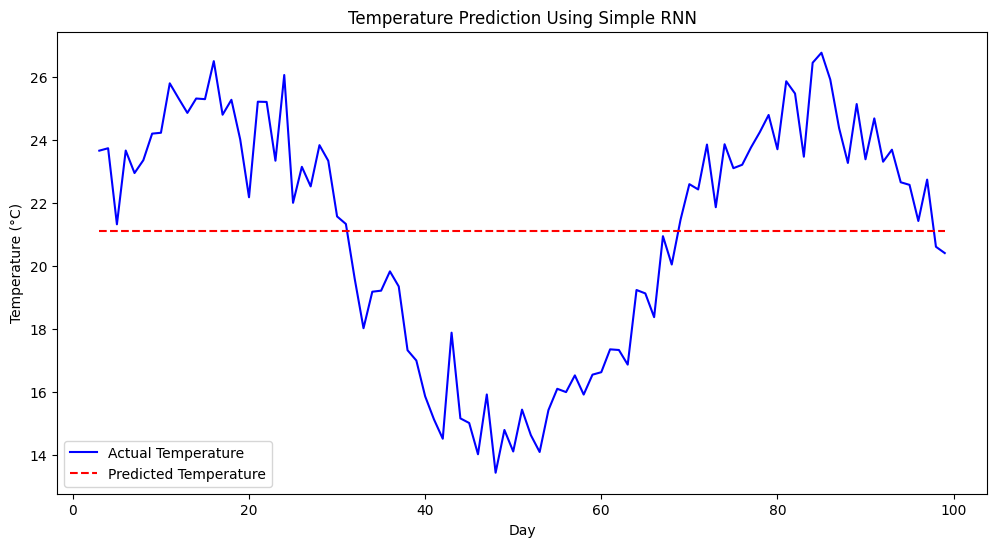

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic daily temperature data
np.random.seed(0)
days = 100
temperature_data = 20 + 5 * np.sin(np.linspace(0, 3 * np.pi, days)) + np.random.normal(0, 1, days)

# Plot the synthetic temperature data
plt.figure(figsize=(12, 6))
plt.plot(temperature_data, label='Daily Temperature (°C)', color='b')
plt.title('Synthetic Daily Temperature Data')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Prepare the dataset for the RNN
def create_dataset(data, time_steps=3):
    X, Y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        Y.append(data[i + time_steps])
    return np.array(X), np.array(Y)

# Use a window of 3 days to predict the next day's temperature
time_steps = 3
X, Y = create_dataset(temperature_data, time_steps)

# Reshape the input data to match the RNN input format (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)
Y = Y.reshape(Y.shape[0], 1)

# Simple RNN class from scratch
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.U = np.random.randn(hidden_size, input_size)  # Input to hidden (input_size=1)
        self.W = np.random.randn(hidden_size, hidden_size) # Hidden to hidden
        self.V = np.random.randn(output_size, hidden_size) # Hidden to output

        self.b = np.zeros((hidden_size, 1))
        self.c = np.zeros((output_size, 1))
        self.hidden_state = np.zeros((hidden_size, 1))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, x):
        # Process each time step
        for t in range(x.shape[0]):
            x_t = x[t].reshape(-1, 1)
            self.hidden_state = self.sigmoid(np.dot(self.U, x_t) + np.dot(self.W, self.hidden_state) + self.b)
        y_pred = np.dot(self.V, self.hidden_state) + self.c
        return y_pred

    def backward(self, x, y_true, y_pred, learning_rate=0.001):
        output_error = y_pred - y_true
        output_delta = output_error

        hidden_error = np.dot(self.V.T, output_delta)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_state)

        self.V -= learning_rate * np.dot(output_delta, self.hidden_state.T)
        for t in reversed(range(x.shape[0])):
            x_t = x[t].reshape(-1, 1)
            self.U -= learning_rate * np.dot(hidden_delta, x_t.T)
            self.W -= learning_rate * np.dot(hidden_delta, self.hidden_state.T)
            self.b -= learning_rate * hidden_delta
        self.c -= learning_rate * output_delta

    def train(self, X, Y, epochs=1000, learning_rate=0.001):
        for epoch in range(epochs):
            epoch_loss = 0
            for i in range(len(X)):
                x = X[i]
                y_true = Y[i].reshape(-1, 1)
                y_pred = self.forward(x)
                epoch_loss += np.mean((y_true - y_pred) ** 2)
                self.backward(x, y_true, y_pred, learning_rate)

            if epoch % 100 == 0:
                print(f'Epoch {epoch}/{epochs}, Loss: {epoch_loss / len(X)}')

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            x = X[i]
            y_pred = self.forward(x)
            predictions.append(y_pred.flatten())
        return np.array(predictions)

# Instantiate the RNN model
input_size = 1
hidden_size = 5
output_size = 1
rnn = SimpleRNN(input_size, hidden_size, output_size)

# Train the RNN model
rnn.train(X, Y, epochs=1000, learning_rate=0.001)

# Predict the next temperatures
predictions = rnn.predict(X)

# Plot the actual vs. predicted temperatures
plt.figure(figsize=(12, 6))
plt.plot(range(time_steps, len(temperature_data)), temperature_data[time_steps:], label='Actual Temperature', color='b')
plt.plot(range(time_steps, len(temperature_data)), predictions, label='Predicted Temperature', color='r', linestyle='--')
plt.title('Temperature Prediction Using Simple RNN')
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()
